In [55]:
%matplotlib inline
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams["figure.dpi"] = 100
img_dir = "./images/"

In [86]:
def generate_rang_graph(v=100, e=200):
    G = nx.generators.random_graphs.gnm_random_graph(v, e, directed=False)
    return G

def draw_graph(G):
    #plt.subplot(121)
    #nx.draw(G, with_labels=True, font_weight='bold')
    plt.subplot(111)

    nx.draw_shell(G, with_labels=True, font_weight='bold')
    plt.savefig(img_dir + "graph.png")

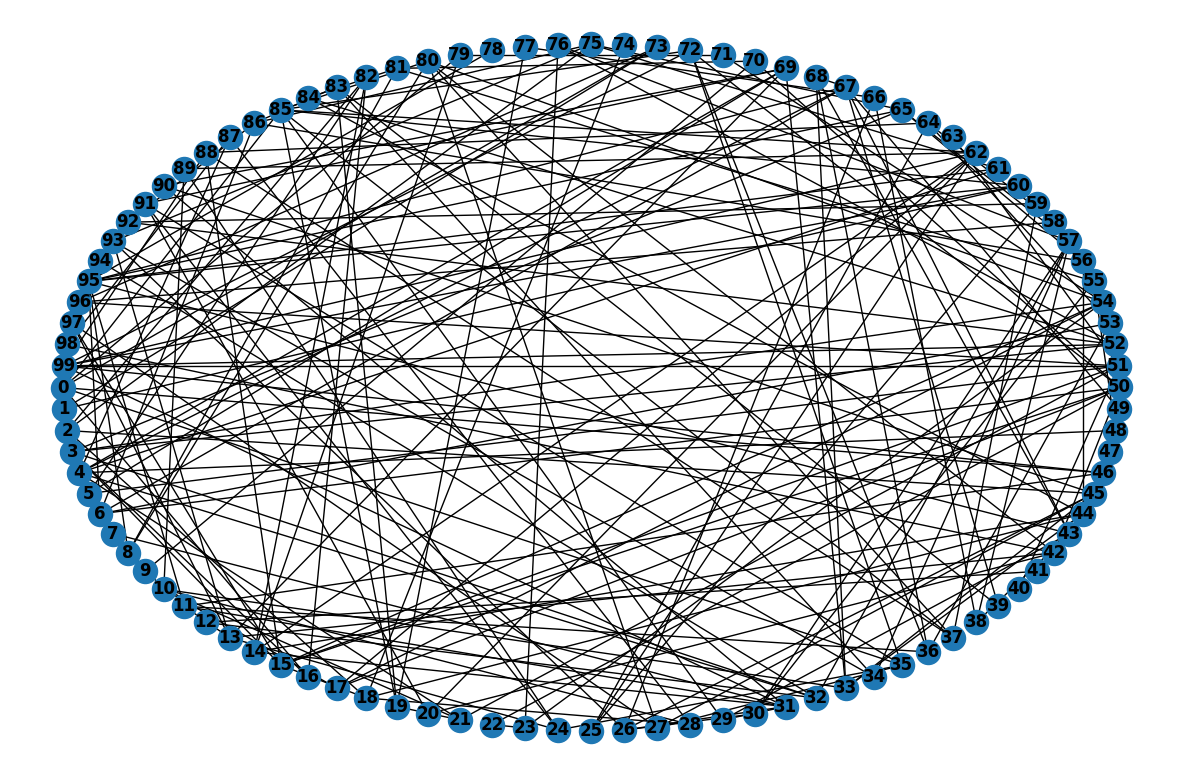

In [87]:
graph = generate_rang_graph()
draw_graph(graph)

# Adjacency Matrix

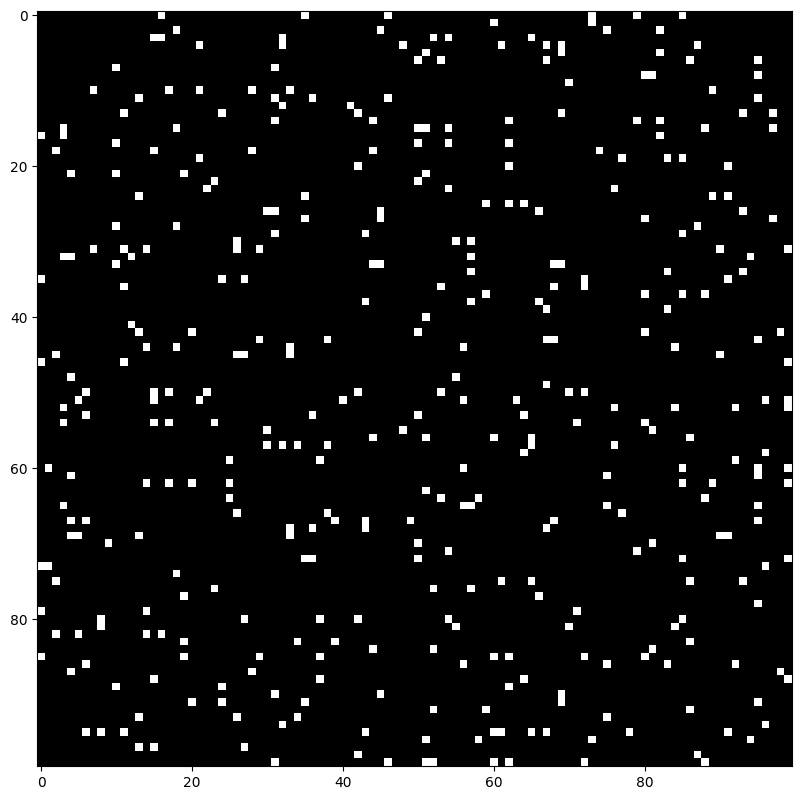

In [88]:
adj_matrix = nx.to_numpy_array(graph)
_ = plt.imshow(adj_matrix, cmap="gray")
plt.savefig(img_dir + "adj_matrix.png")

# Adjacency list

In [99]:
adj_list = nx.to_dict_of_lists(graph)
n_lines = 0
for key in adj_list.keys():
    if n_lines == 5:
        break
    print(f"{key}: {adj_list[key]}")
    n_lines+=1

0: [73, 46, 16, 79, 85, 35]
1: [73, 60]
2: [75, 18, 45, 82]
3: [52, 32, 15, 16, 54, 65]
4: [69, 32, 48, 67, 61, 87, 21]


# DFS and Connected Components

In [115]:
# %%timeit -n1000

connected_components = []

not_visited = np.array(graph.nodes)

while len(not_visited) != 0:
    node = not_visited[0]
    not_visited = not_visited[1:]
    dfs_search = list(nx.algorithms.traversal.depth_first_search.dfs_edges(graph, source=node))
    dfs_nodes = list(map( lambda x: x[1], dfs_search))
    conn_comp = [node]
    conn_comp.extend(dfs_nodes)
    conn_comp.sort()
    connected_components.append(conn_comp)
    mask = list(map(lambda x: x not in conn_comp, not_visited))
    not_visited = not_visited[mask]

1.12 ms ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


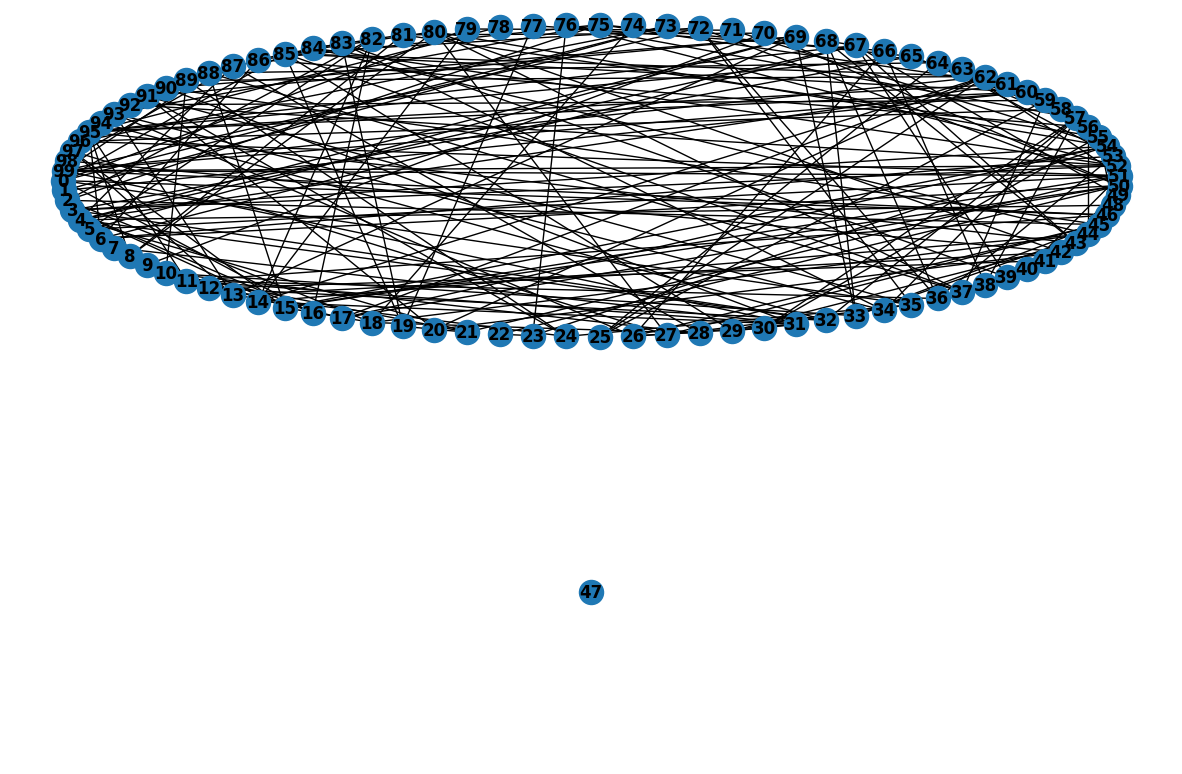

In [91]:
n_comp = len(connected_components)
for i in range(1, n_comp+1):
    plt.subplot(n_comp,1,i)
    nx.draw_shell(graph.subgraph(connected_components[i-1]), with_labels=True, font_weight='bold')
    
plt.savefig(img_dir + "strong_comp.png")

In [92]:
print(f"Number of connected componets is {len(list(nx.connected.connected_components(graph)))}")

Number of connected componets is 2


# BFS

In [117]:
# %%timeit -n1000
random_start = np.random.choice(graph.nodes)
random_target = np.random.choice(graph.nodes)
print(random_start, random_target)
paths = nx.algorithms.shortest_paths.unweighted.single_source_shortest_path(graph, random_start)
try:
    print(f"Shortest path between {random_start} and {random_target} is {paths[random_target]} with {len(paths[random_target])} steps.")
except KeyError as e:
    print(f"No path found between {random_start} and {random_target}")    

70 9
Shortest path between 70 and 9 is [70, 9] with 2 steps.


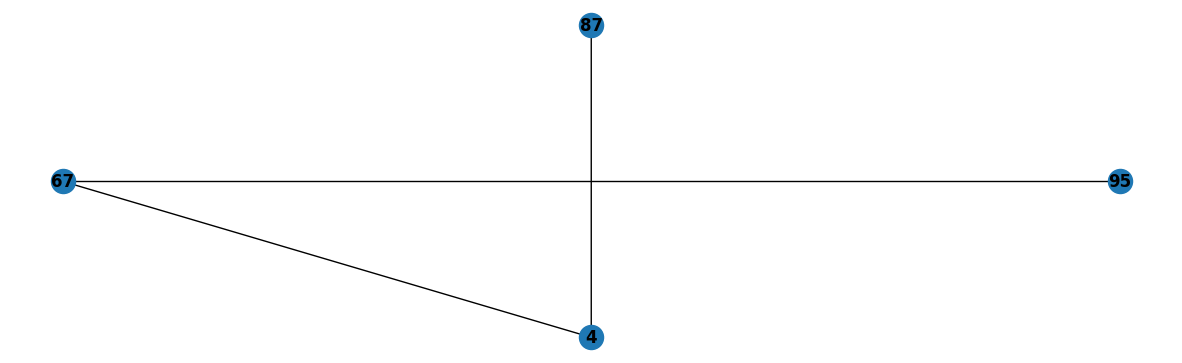

In [98]:
#draw_graph(graph.subgraph(paths[random_target]))
plt.subplot(n_comp,1,i)
nx.draw_shell(graph.subgraph(paths[random_target]), with_labels=True, font_weight='bold')
plt.savefig(img_dir + "bfs_path.png")